In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [16]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

In [17]:
cols = ['Pregnancies', 'Glucose' , 'BloodPressure' , 'SkinThickness' , 'Insulin' , 'BMI' , 'DiabetesPedigreeFunction' ,'Age' , 'Outcome']

cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [18]:
df = pd.read_csv(url, names=cols)

X= df.drop('Outcome', axis=1)
y = df['Outcome']

In [19]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.2 , random_state=42)

In [55]:
clf1 = DecisionTreeClassifier(criterion='entropy' , max_depth=3 , random_state=42)
clf1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [56]:
clf2 = RandomForestClassifier(criterion='entropy' , max_depth=3 , random_state=42)
clf2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, random_state=42)

In [57]:
#DecisionTree
y_pred1 = clf1.predict(X_test)
print("Accuracy:" , accuracy_score(y_test, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test , y_pred1))

Accuracy: 0.7662337662337663
Confusion Matrix:
 [[83 16]
 [20 35]]


In [58]:
#DecisionTree
y_pred2 = clf2.predict(X_test)
print("Accuracy:" , accuracy_score(y_test, y_pred2))
print("Confusion Matrix:\n", confusion_matrix(y_test , y_pred2))

Accuracy: 0.7597402597402597
Confusion Matrix:
 [[87 12]
 [25 30]]


In [59]:
importances =clf2.feature_importances_
feat_importance=pd.Series(importances, index=X.columns).sort_values(ascending=False)

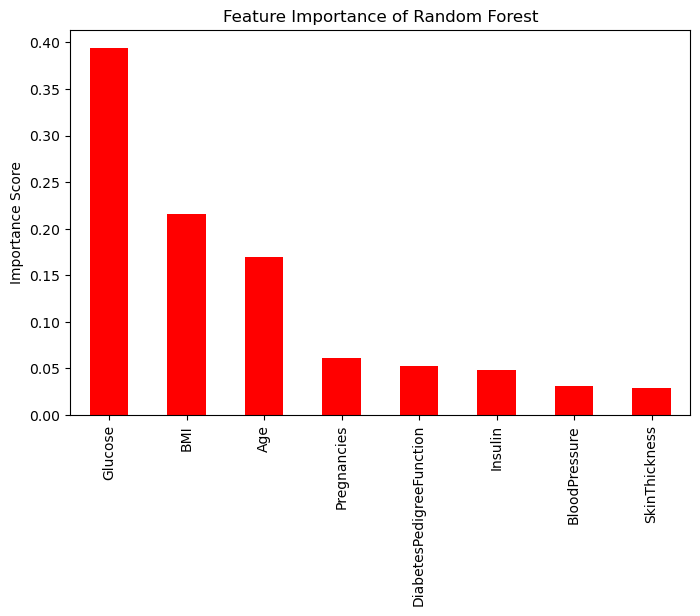

In [60]:
plt.figure(figsize=(8,5))
feat_importance.plot(kind='bar', color='red')
plt.title("Feature Importance of Random Forest")
plt.ylabel("Importance Score")
plt.show()